# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

● ‘ScheduledDay’ tells us on what day the patient set up their appointment.

● ‘Neighborhood’ indicates the location of the hospital.

● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

● for the last column: it says ‘No’ ifthe patient showed up to their appointment, and ‘Yes’ if they did not show up.



### Question(s) for Analysis

1- which number is higher the  total number for No-Show up or for show up?

2- which factor has the greatest effect on the patient not to come to the appointment 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')

## discover the data

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
df.shape

(110527, 14)

### Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


## check rows with missing values

In [7]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

## After checking  no missing data to remove or compensate.

### check for duplicated

In [8]:
sum(df.duplicated())


0

### Remove duplicated

In [9]:
df.drop_duplicates(inplace=True)
sum(df.duplicated())


0

## Check logical values of the Age and fix them

In [10]:
df[df['Age'] <= 0] 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
89,4.314932e+14,5640380,M,2016-04-29T10:37:02Z,2016-04-29T00:00:00Z,0,MONTE BELO,0,0,0,0,0,0,No
101,6.822847e+13,5642813,M,2016-04-29T17:24:19Z,2016-04-29T00:00:00Z,0,BONFIM,0,0,0,0,0,0,No
104,3.326985e+12,5632495,F,2016-04-28T08:04:48Z,2016-04-29T00:00:00Z,0,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
132,8.468587e+14,5560742,M,2016-04-08T09:29:23Z,2016-04-29T00:00:00Z,0,PRAIA DO SUÁ,0,0,0,0,0,1,Yes
150,5.392419e+10,5641476,M,2016-04-29T13:43:34Z,2016-04-29T00:00:00Z,0,ITARARÉ,0,0,0,0,0,0,No


In [24]:
# to fix the values of  age has 0 or less values, the mean will be calcluated and compensate these values
meanAge = df['Age'].mean()
df[df['Age'] <= 0] = meanAge


# Remove some not related columns

In [35]:
#df.drop(['PatientId', 'AppointmentID'], axis = 1, inplace = True)

In [36]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,showed,not_showed
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,1.0,False,True
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False,True
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False,True
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False,True
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,1.0,False,True


## convert the Date values to datatime datatype

In [37]:
# converting some columns that has date to a datetime datatype
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [38]:
#replacing the dash in No-show To Underscore "No_show"
df.rename(columns={'No-show':'No_show'}, inplace=True)

In [39]:
df['No_show'].value_counts()

1.000000     85307
0.000000     21680
37.088874     3540
Name: No_show, dtype: int64

In [40]:
df.replace(to_replace=['No', 'Yes'], value=[1, 0],inplace=True)
df['No_show'] = pd.to_numeric(df['No_show'])



In [41]:
showed = df['No_show'] == 0
not_showed = df['No_show'] == 1
df['showed'] = showed
df['not_showed'] = not_showed
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,showed,not_showed
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,1.0,False,True
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False,True
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False,True
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False,True
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,1.0,False,True


<a id='eda'></a>
## Exploratory Data Analysis

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

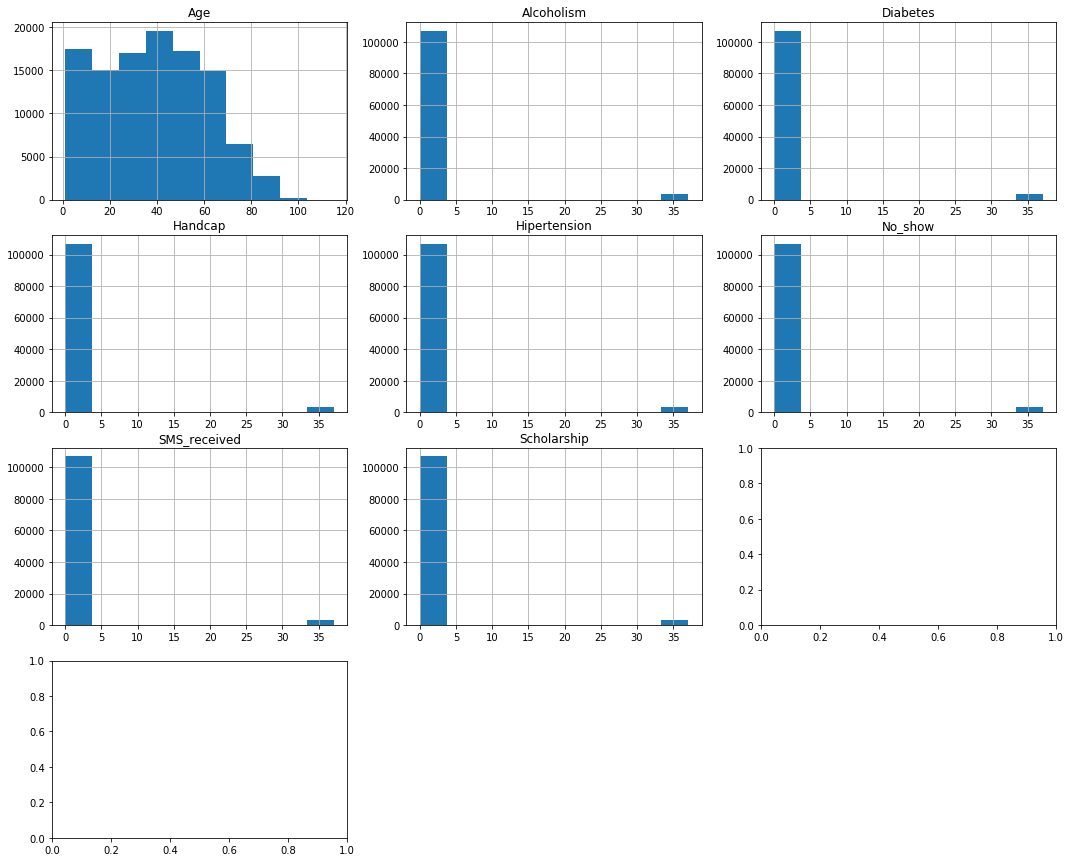

In [57]:
df.hist(figsize = (18,15));

# lets look at the correlation matrix to show the relationship the No-show and all other variables



In [29]:
df.corr()


,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,showed,not_showed
Age,1.000000,-0.014891,0.020822,0.001725,-0.007396,-0.007941,-0.009379,-0.005617,-0.065872,0.066430
Scholarship,-0.014891,1.000000,0.997043,0.998134,0.998660,0.998649,0.996451,0.996975,-0.088432,-0.335459
Hipertension,0.020822,0.997043,1.000000,0.998400,0.997935,0.997956,0.995593,0.996378,-0.091950,-0.331785
Diabetes,0.001725,0.998134,0.998400,1.000000,0.998890,0.998967,0.996657,0.997348,-0.090412,-0.333691
Alcoholism,-0.007396,0.998660,0.997935,0.998890,1.000000,0.999351,0.997087,0.997746,-0.089838,-0.334418
Handcap,-0.007941,0.998649,0.997956,0.998967,0.999351,1.000000,0.997134,0.997795,-0.089985,-0.334295
SMS_received,-0.009379,0.996451,0.995593,0.996657,0.997087,0.997134,1.000000,0.995021,-0.080643,-0.342207
No_show,-0.005617,0.996975,0.996378,0.997348,0.997746,0.997795,0.995021,1.000000,-0.151205,-0.275695
showed,-0.065872,-0.088432,-0.091950,-0.090412,-0.089838,-0.089985,-0.080643,-0.151205,1.000000,-0.908507
not_showed,0.066430,-0.335459,-0.331785,-0.333691,-0.334418,-0.334295,-0.342207,-0.275695,-0.908507,1.000000


Most of correlations positive/negative are  small.

there is a Negative correlation between SMS_received and the No-show data.
Hipertension and Diabetes are correlated with the increase in the age which to be predicted

## Research Question 1 : what is the overall appointment show-up vs. no show-up rate?


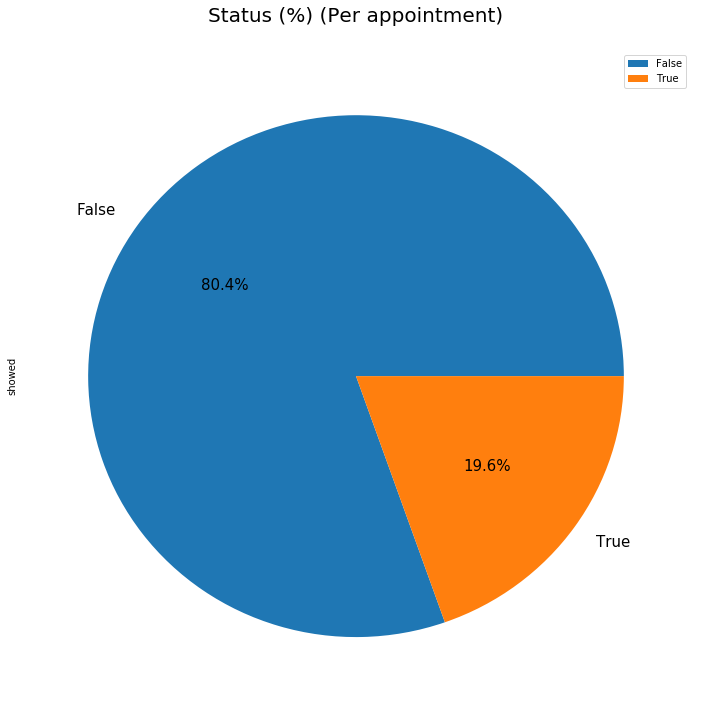

In [30]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
sh = df['showed'].value_counts()
piechart = sh.plot.pie(figsize=(12,12) ,autopct='%1.1f%%', fontsize = 15);
piechart.set_title("Status" + ' (%) (Per appointment)\n', fontsize = 20);
plt.legend();

### The Pie chart shows that 80 percent of the patients showed up and alomst 20 percent did not show up.

In [21]:
print(df.showed.value_counts())

False    88847
True     21680
Name: showed, dtype: int64


## Research Question 2: is there a relation between patient's Showing to the clinic and Age ?


Text(0.5,1,'Age of people who showed')

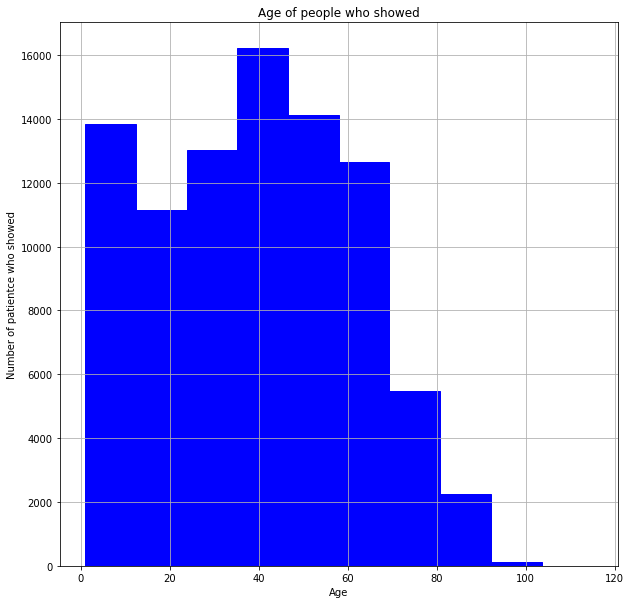

In [53]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

df.groupby('showed')['Age'].hist(figsize=(10,10),Color='blue');
plt.xlabel("Age")
plt.ylabel("Number of patientce who showed")
plt.title("Age of people who showed")



### Patients in the age between 40-50 showed more than any other age group and the older they get the less they show to the clinic in the appointment

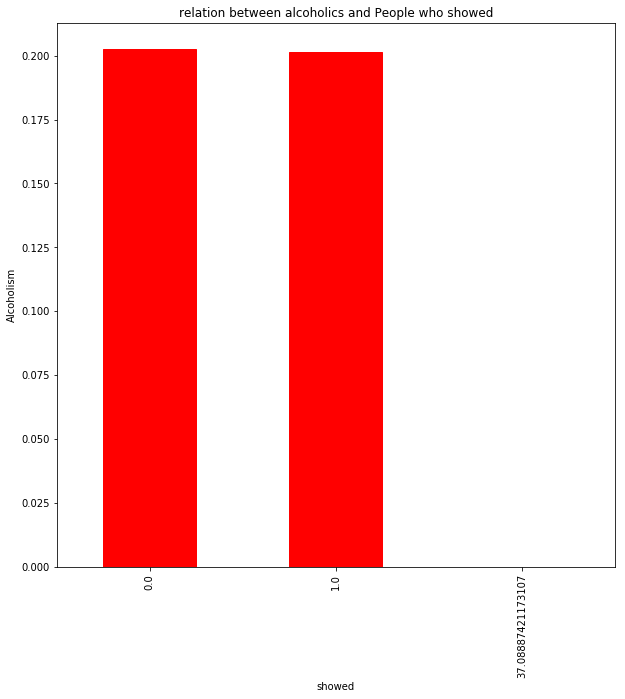

In [54]:
#see the relation between alcoholic people and people who showed up and who didn't

def bar_plot(arg1, arg2, arg3):
    df.groupby(arg1)['showed'].mean().plot(kind='bar', figsize=(10,10),Color=arg2);
    plt.xlabel("showed")
    plt.ylabel(arg1)
    plt.title(arg3)
    plt.legend

bar_plot('Alcoholism','red','relation between alcoholics and People who showed')

#df.groupby('Alcoholism')['showed'].mean().plot(kind='bar',figsize=(10,10),color='cyan');
#plt.xlabel("Showed")
#plt.ylabel("Alcoholism")
#plt.title("relation between alcoholics and patients who showed")
#plt.legend()

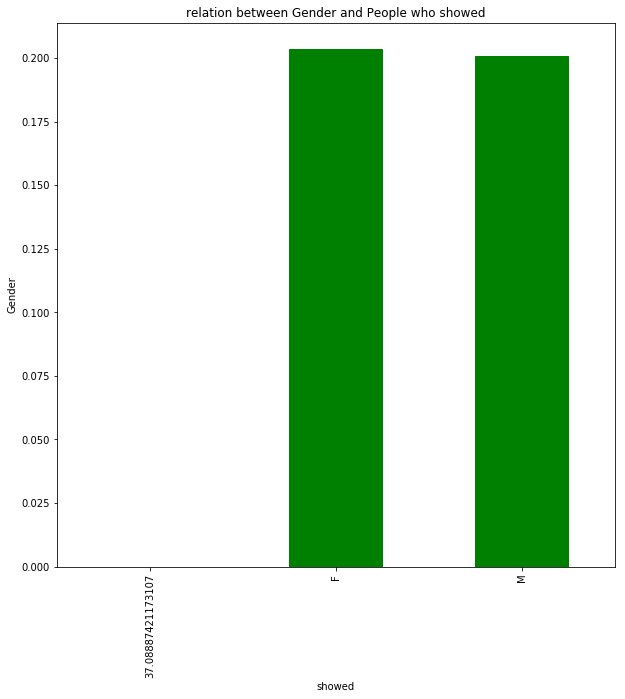

In [55]:
#see the relation between Gender and people who showed up and who didn't

bar_plot('Gender','green','relation between Gender and People who showed')

#df.groupby('Gender')['showed'].mean().plot(kind='bar',figsize=(8,8),color='blue');
#plt.xlabel("Showed")
#plt.ylabel("Gender")
#plt.title("relation between Gender and patients who showed")
#plt.legend()

<a id='conclusions'></a>
## Conclusions

Age has a clear impact on the attendance rate, The most attending are age between 40 and 50 years, followed by 50 to 60 years.
The average age of the patients is 37.
25% of patients are less than 18 years, the majority of patients are between 18 and 55 years.

Almost 20% of the patients didn't show up to their appointments. 

Most of the patients don't have Diabetes or Alcoholic or Hipertension. 
regarding to Gender women attend a bit more than men, which mean that women care about their health more than men.



## Limitations

The dataset was not very easy to search into, all correlations were very small.
A lot of Age values were missing, which may lead to inacurate results.
if  the patient job is included,it would help to determine if there a correlation between the job and show up.


In [23]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0